In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
dataset = pd.read_csv('Housing.csv')

In [166]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [167]:
print(dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [168]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [169]:
print(dataset.shape)

(545, 13)


EXPLORATORY DATA ANALYSIS

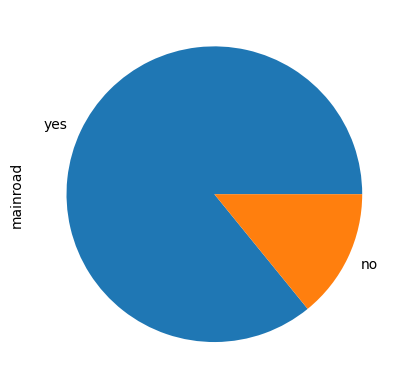

In [170]:
dataset.mainroad.value_counts(normalize=True).plot.pie()
plt.show()

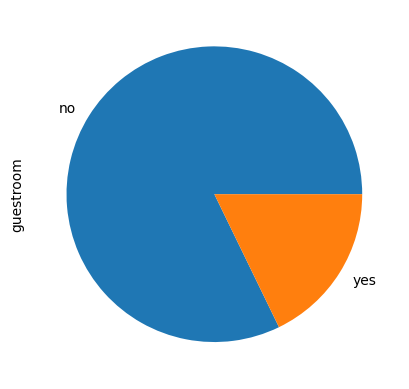

In [171]:
dataset.guestroom.value_counts(normalize=True).plot.pie()
plt.show()

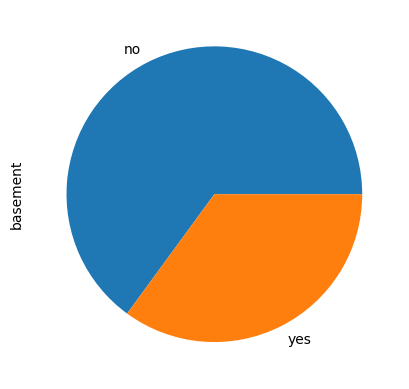

In [172]:
dataset.basement.value_counts(normalize=True).plot.pie()
plt.show()

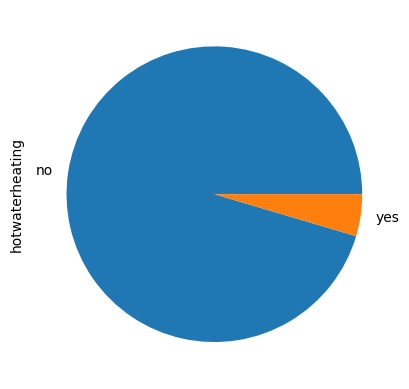

In [173]:
dataset.hotwaterheating.value_counts(normalize=True).plot.pie()
plt.show()

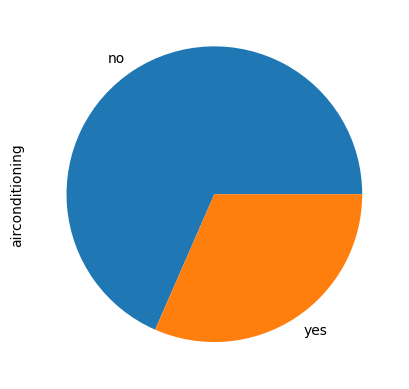

In [174]:
dataset.airconditioning.value_counts(normalize=True).plot.pie()
plt.show()

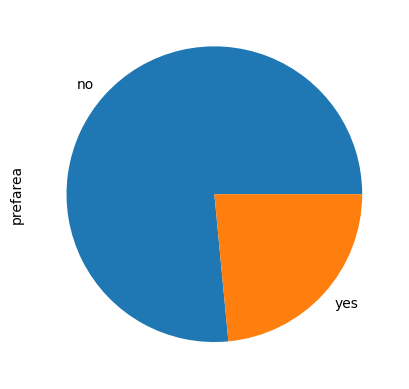

In [175]:
dataset.prefarea.value_counts(normalize=True).plot.pie()
plt.show()

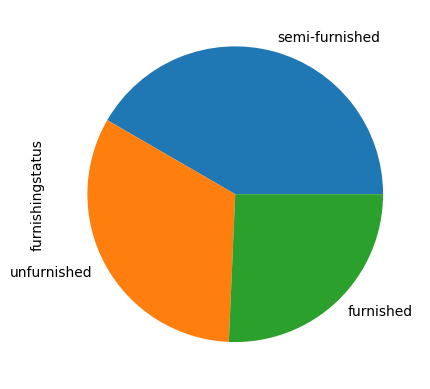

In [176]:
dataset.furnishingstatus.value_counts(normalize=True).plot.pie()
plt.show()

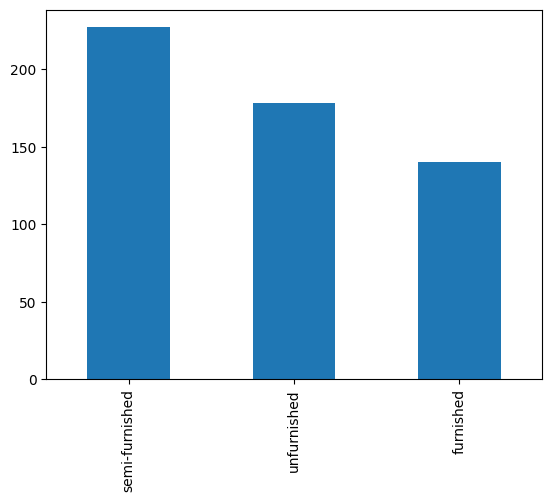

In [177]:
dataset.furnishingstatus.value_counts().plot.bar()
plt.show()

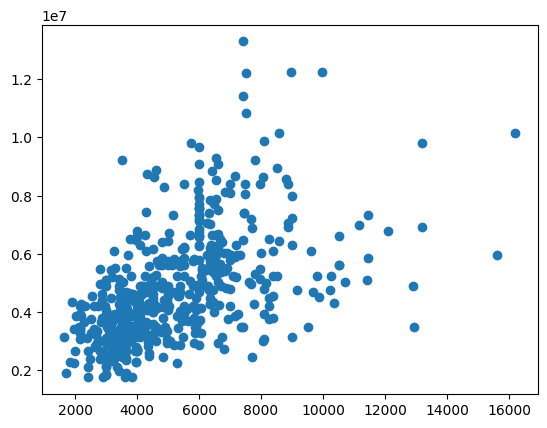

In [178]:
plt.scatter(dataset.area,dataset.price)
plt.show()


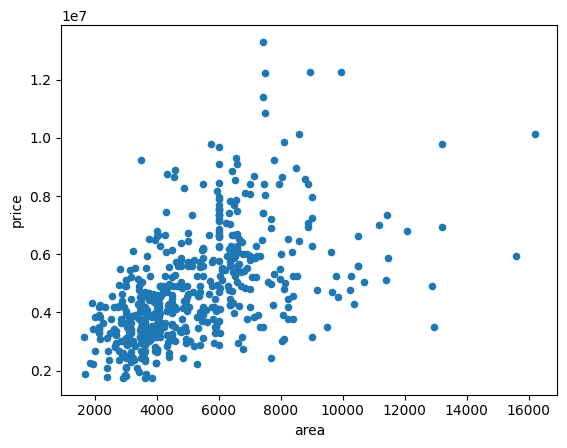

In [179]:
dataset.plot.scatter(x="area",y="price")
plt.show()

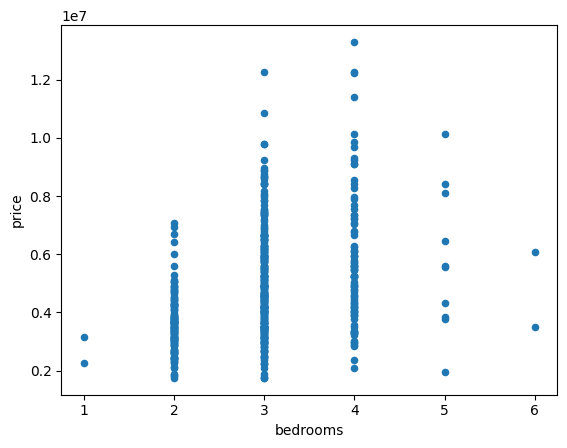

In [180]:
dataset.plot.scatter(x="bedrooms",y="price")
plt.show()

<ipython-input-181-5b0bc4b32069>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset[['area','bathrooms','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','price']].corr()
<ipython-input-181-5b0bc4b32069>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset[['area','bathrooms','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','price']].corr(), annot=True, cmap = 'PiYG')


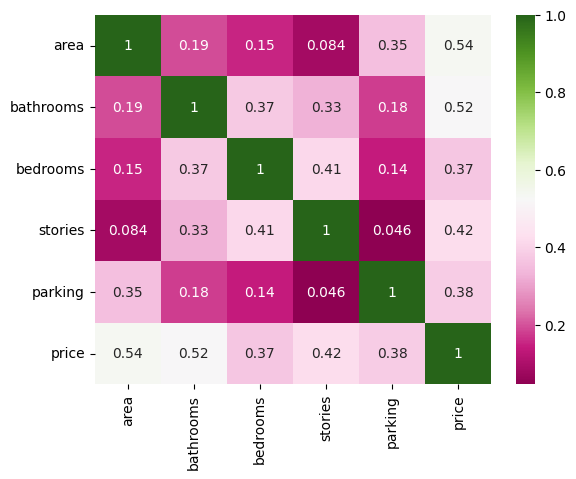

In [181]:
dataset[['area','bathrooms','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','price']].corr()
sns.heatmap(dataset[['area','bathrooms','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','price']].corr(), annot=True, cmap = 'PiYG')
plt.show()

In [182]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
dataset[varlist] = dataset[varlist].apply(binary_map)

In [183]:
status = pd.get_dummies(dataset['furnishingstatus'])

In [184]:
status = pd.get_dummies(dataset['furnishingstatus'], drop_first = True)

In [185]:
housing = pd.concat([dataset, status], axis = 1)

In [186]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [187]:
dataset.drop(['furnishingstatus'], axis = 1, inplace = True)

In [188]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [189]:
dataset = pd.concat([dataset, status], axis = 1)

In [190]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [191]:
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, :1].values

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [193]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [194]:
print(x_train)

[[-0.5   0.01 -0.58 ... -0.57  1.16 -0.68]
 [ 0.62  0.01 -0.58 ...  1.76 -0.86 -0.68]
 [-0.49  1.35 -0.58 ... -0.57 -0.86  1.47]
 ...
 [-0.07  0.01 -0.58 ...  1.76 -0.86  1.47]
 [ 0.23  0.01 -0.58 ... -0.57  1.16 -0.68]
 [ 1.73  1.35  1.39 ... -0.57 -0.86 -0.68]]


In [195]:
print(x_test)

[[ 0.48  1.35  1.39 ... -0.57 -0.86 -0.68]
 [ 1.46  1.35 -0.58 ... -0.57 -0.86  1.47]
 [ 2.4   1.35  1.39 ... -0.57  1.16 -0.68]
 ...
 [ 3.62 -1.33 -0.58 ... -0.57 -0.86 -0.68]
 [ 1.17 -1.33 -0.58 ... -0.57 -0.86 -0.68]
 [ 0.42  0.01 -0.58 ...  1.76  1.16 -0.68]]


In [196]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [197]:
y_pred = regressor.predict(x_test)

In [198]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6305417.68  7070000.  ]
 [ 6213853.22  4550000.  ]
 [ 6552975.35  5600000.  ]
 [ 5461129.55  6125000.  ]
 [ 4250945.1   2940000.  ]
 [ 2960943.73  3780000.  ]
 [ 2724161.83  2450000.  ]
 [ 7364540.81  7490000.  ]
 [ 2399155.61  2940000.  ]
 [ 4549456.15  6440000.  ]
 [ 3748550.29  2800000.  ]
 [ 3595286.44  3325000.  ]
 [ 4680228.02  5810000.  ]
 [ 4735410.65  5950000.  ]
 [ 5260666.36  6895000.  ]
 [ 7932596.98 13300000.  ]
 [ 4320848.88  3640000.  ]
 [ 3524363.53  2870000.  ]
 [ 6780229.25  5460000.  ]
 [ 2658354.28  1890000.  ]
 [ 4602977.9   3780000.  ]
 [ 5288794.97  5600000.  ]
 [ 5213197.54  2660000.  ]
 [ 3500380.27  3640000.  ]
 [ 5308434.32  2590000.  ]
 [ 6960288.57  5250000.  ]
 [ 2767308.13  2450000.  ]
 [ 7315992.64  6930000.  ]
 [ 7617590.54  9800000.  ]
 [ 4365295.17  3430000.  ]
 [ 7562556.31  7840000.  ]
 [ 6587921.27  5950000.  ]
 [ 4958237.4   3430000.  ]
 [ 4499776.7   2940000.  ]
 [ 6041408.41  6090000.  ]
 [ 4685509.37  4620000.  ]
 [ 6477135.32  4543000.  ]
 

In [199]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error is", mse)
print("R2 Score is", r2)

Mean Squared Error is 1586758224575.701
R2 Score is 0.6221280430074461


MSE IS COMING VERY HIGH THAT MEANS THERE IS QUITE HIGH DIFFERENCE IN ACTUAL AND PREDICTED VALUES.THIS IS COMING BECAUSE OF FOLLOWING REASONS:
1). THERE ARE OUTLIERS IN DATASET, I DEPLOY THE MODEL AFTER REMOVING OUTLIERS BUT THERE WAS NOT MUCH SIGNIFICANT DIFFERENCE IN MSE VALUES.
2). ALSO THERE IS NO LINEARITY IN THE DATASET AND ALSO THE DATA QUALITY IS NOT GOOD.